# IS THAT SANTA ?

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/339.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/97.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/363.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/117.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/436.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/340.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/137.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/14.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/158.not-a-santa.jpg
/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/394.not-a-santa.jpg
/k

In [4]:
#Generate batches of tensor image data with real-time data augmentation to train the model :
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator( rescale = 1./255,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
#Import datasets
training_set = train_datagen.flow_from_directory('/kaggle/input/is-that-santa-image-classification/is that santa/train',
target_size = (64, 64), batch_size = 32, class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/kaggle/input/is-that-santa-image-classification/is that santa/test', 
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

Found 614 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


Found 614 images belonging to 2 classes.
Found 614 images belonging to 2 classes.


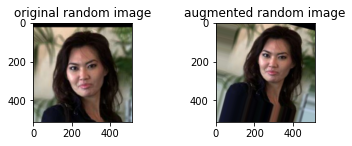

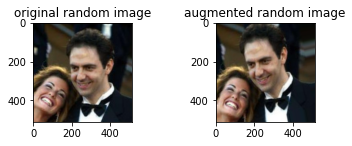

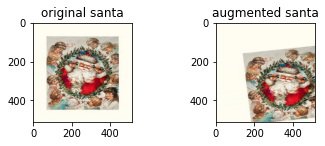

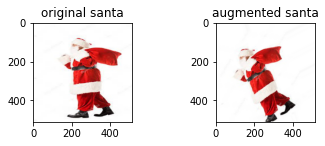

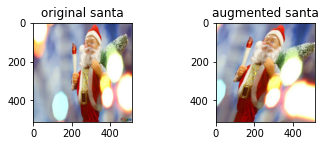

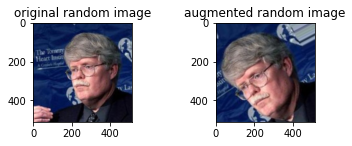

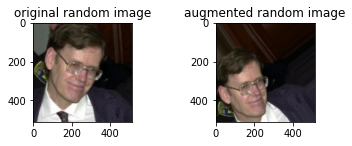

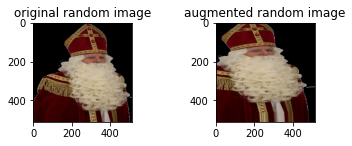

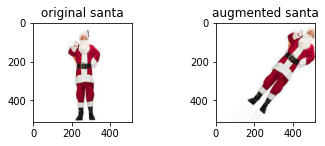

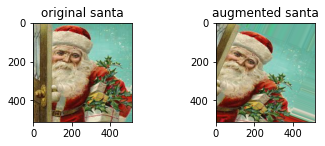

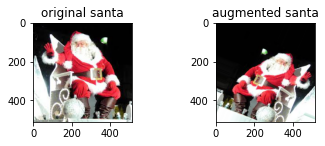

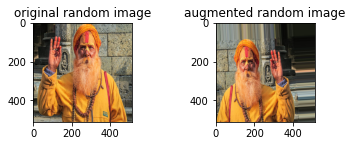

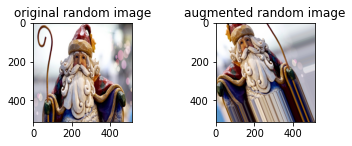

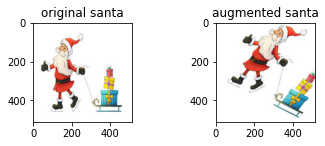

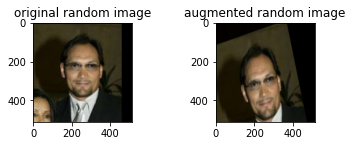

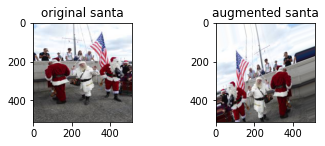

In [6]:
#Check the results of the preprocessing:
import matplotlib.pyplot as plt
%matplotlib inline


batches_real = test_datagen.flow_from_directory('/kaggle/input/is-that-santa-image-classification/is that santa/train', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_augmented = train_datagen.flow_from_directory('/kaggle/input/is-that-santa-image-classification/is that santa/train', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)
x_batch_real, y_batch_real = next(batches_real)

for i in range(16):
    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]
    
    title_add_on = "random image"
    if y_batch_augmented[i][1]: title_add_on =  "santa"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)

        
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)

    plt.show()

In [7]:
#Creation of a CNN:

#Import libraries and packages
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

#Initialize CNN:
classifier = Sequential()
filters = 32

classifier.add(Conv2D(filters, activation = 'relu',kernel_size = 1,
                      input_shape = (64,64,3),name='conv2d_5'  ))
                 
classifier.add(MaxPooling2D(pool_size=2, name='max_pooling2d_5'))
classifier.add(Conv2D(filters , kernel_size = 3, 
                     padding = 'valid', 
                     activation = 'relu',name='conv2d_6' ))
  
classifier.add(MaxPooling2D(pool_size=2,padding='same',name='max_pooling2d_6'))

classifier.add(Flatten(name='flatten_3'))
          
classifier.add(Dense(units = 128, 
                    activation = 'relu',name='dense_5') )
classifier.add(Dense(units = 2, 
                    activation = 'softmax',name='dense_6'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2

2022-11-03 16:21:49.505316: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping 

earlystop = EarlyStopping(monitor = 'val_loss', 
                    patience = 4, 
                    mode='min', 
                    restore_best_weights = True) 


lr_plateau = ReduceLROnPlateau(monitor='val_loss',
                                         patience=3,
                                         factor=0.5,
                                         verbose=2,
                                         mode='min',
                                         min_lr=1e-10)

In [9]:
batch_size=32
epochs=20

#Compile CNN
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy']) 
#Fit the CNN to the images
classifier_history = classifier.fit_generator( 
            training_set, # use augmented images for train   
            validation_data = test_set, # use augmented images for test 
            epochs = epochs, 
            callbacks = [ earlystop,lr_plateau],
            verbose=True) 


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-03 16:21:57.747233: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
20/20 [==============================] - 25s 1s/step - loss: 0.6892 - accuracy: 0.5440 - val_loss: 0.6473 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 19s 994ms/step - loss: 0.5950 - accuracy: 0.6759 - val_loss: 0.5424 - val_accuracy: 0.6851
Epoch 3/20
20/20 [==============================] - 19s 979ms/step - loss: 0.5037 - accuracy: 0.8160 - val_loss: 0.4443 - val_accuracy: 0.7955
Epoch 4/20
20/20 [==============================] - 19s 990ms/step - loss: 0.4229 - accuracy: 0.8208 - val_loss: 0.3724 - val_accuracy: 0.8425
Epoch 5/20
20/20 [==============================] - 19s 988ms/step - loss: 0.4056 - accuracy: 0.8404 - val_loss: 0.5809 - val_accuracy: 0.7305
Epoch 6/20
20/20 [==============================] - 19s 970ms/step - loss: 0.3860 - accuracy: 0.8583 - val_loss: 0.4516 - val_accuracy: 0.7906
Epoch 7/20
20/20 [==============================] - 19s 959ms/step - loss: 0.3990 - accuracy: 0.8420 - val_loss: 0.3580 - val_accuracy: 0.8604
Ep

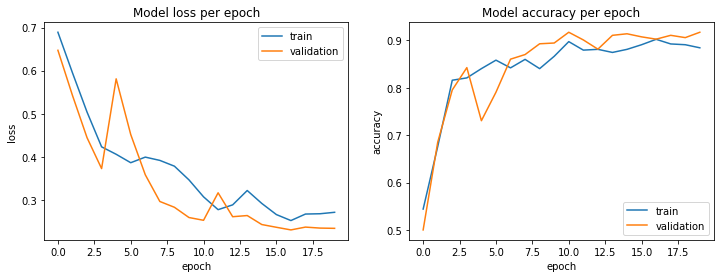

In [12]:
#Plot loss and accuracy per epoch
fig=plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
ax.set_title('Model loss per epoch')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
    
ax = fig.add_subplot(122)
plt.plot(classifier_history.history['accuracy'])
plt.plot(classifier_history.history['val_accuracy'])
ax.set_title('Model accuracy per epoch')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
    

plt.show()

In [13]:
#Test few images from test file:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

#Function to plot image and probability 
def test_img(image_to_test):
    txt =image_to_test 
    test_image = image.load_img(txt, target_size = (64, 64))
    test_image = image.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis = 0)

    proba = round(100*classifier.predict(test_image)[0][1], 2)
    if proba < 50:
        santa_or_not = 'Not Santa'
        proba = round(100-proba, 2)
    else:
        santa_or_not = 'Santa'
    img = mpimg.imread(txt)
    plt.axis('off')
    plt.text(-10, -15, santa_or_not+': '+str(proba)+'%', color = (1, 0, 0), fontsize = 20, fontweight = 'extra bold')
    imgplot = plt.imshow(img)


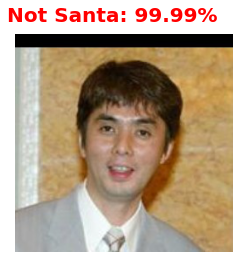

In [19]:
  test_img('/kaggle/input/is-that-santa-image-classification/is that santa/test/not-a-santa/505.not-a-santa.jpg')

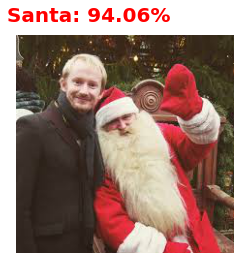

In [15]:
 test_img('/kaggle/input/is-that-santa-image-classification/is that santa/test/santa/139.Santa.jpg')